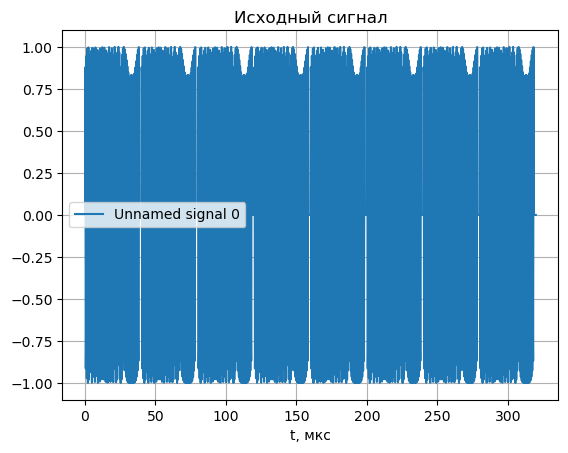

d:\Anaconda\Lib\site-packages\matplotlib\axes\_axes.py:8089: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


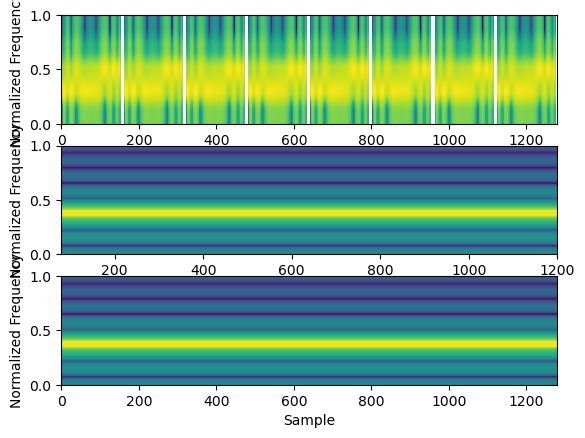

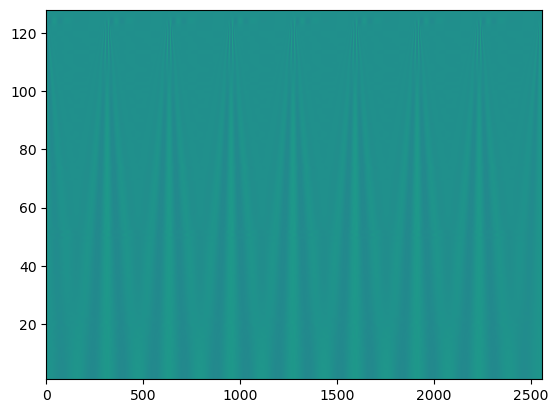

In [2]:
# %% 
# Лабораторная №4 
"""
В программе: 
1) Загрузка дополнительных библиотек
2) Генерация последовательности импульсов
3) Вывод сигнала
4) Вывод спектрограм
    - с коротким окном
    - с длинным окном и сдвигом окна на один отсчёт
    - с длинным окном с шагом на величину окна
5) Карты коэффициентов вейвлет-преобразования

Для вывода графиков в отдельное окно используйте
>>> %matplotlib qt
"""
# %%
# Импорт и инициализация
from matplotlib import pyplot as plt
from viewtoolbox import *
from mathtoolbox import *
import pywt


# Задача - выполнить анализ сигнала с использованием спектрограмм и вейвлет-разложения
# Исходные параметры
N = 18
f_d = 8e6                          # частота дискретизации, Гц
t_d = 1/f_d                        # период дискретизации
# t_impulse = 1/(1000 + 20*N)*1e3    # длительность импульса (t chip)
t_impulse = 40e-6
t_window = 80e-6                   # длительность рассматриваемого интервала
f_carrier = (1000 + 20*N)*1e3      # частота несущей, Гц
f_mod = 0.6e6           
i_mod = 0.8                        # параметры модуляции (частота, глубина)
n_chips = 8             
# %%
# Формирование последовательности отсчетов
s_c = generate_sequence('chirp', t_d, n_chips, t_impulse, f_carrier);   # ЛЧМ импульс
# s_r = generate_sequence('radio', t_d, n_chips, t_impulse, f_carrier);   # р/импульс
# s_am = generate_sequence('AM', t_d, n_chips, t_impulse, f_carrier);     # АМ сигнал
signal_out = s_c  # рез-татов фильтрации
           
# %%
# Формирование последовательности отсчетов
s_c = generate_sequence('chirp', t_d, n_chips, t_impulse, f_carrier);   # ЛЧМ импульс
s_r = generate_sequence('radio', t_d, n_chips, t_impulse, f_carrier);   # р/импульс
s_am = generate_sequence('AM', t_d, n_chips, t_impulse, f_carrier);     # АМ сигнал
signal_out = s_c  # рез-татов фильтрации

# %%
# Синал во временной области
plot_signal([[t_d, signal_out]])            # построение сигнала
window_opt_len = 320
FFT_size = 8
plt.figure()

rect = np.ones([window_opt_len, 1])
# %%
# Анализ спектрограмм 
# Малый размер окна
plt.subplot(311)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(signal_out, 
    NFFT=FFT_size,window=rect[0:FFT_size], noverlap=0)
plt.xlabel('Sample')
plt.ylabel('Normalized Frequency')
# Большой размер окна с шагом на один отсчёт
plt.subplot(312)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(signal_out, 
    NFFT=window_opt_len, window=rect, noverlap=window_opt_len-1)
plt.xlabel('Sample')
plt.ylabel('Normalized Frequency')
# Большой размер окна с шагом на величину окна
plt.subplot(313)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(signal_out, 
    NFFT=window_opt_len, window=rect, noverlap=0)
plt.xlabel('Sample')
plt.ylabel('Normalized Frequency')
plt.show()


# %%
# Анализ карт коэффициентов вейвлет-преобразования (скейлограмм)
cwtmatr, freqs = pywt.cwt(signal_out, np.arange(1,128), 'morl')
plt.figure()
plt.imshow(cwtmatr, extent=[-0, len(signal_out), 1, 128], aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
plt.show() 
